<a href="https://colab.research.google.com/github/dayudyah20/Belajar-Coursera/blob/main/MODEL_NORMAL_HOLLING_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL NORMAL (FIX)

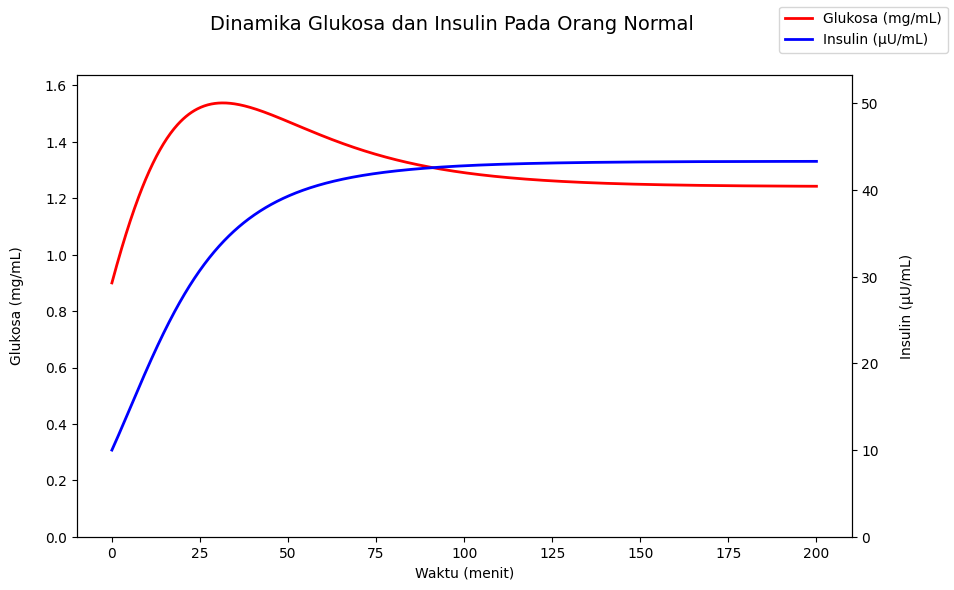

In [70]:

import numpy as np
import matplotlib.pyplot as plt


# Definisi fungsi untuk sistem persamaan
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = delta * G - beta * I * G
    return np.array([dGdt, dIdt])


# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z


# Parameter-parameter
alpha = 6    # Penerimaan glukosa
gamma = 0.005 # Penggunaan glukosa tanpa insulin
theta = 0.001 # Pengaruh insulin pada glukosa
delta = 0.013  # Sekresi insulin dari glukosa
beta = 0.0003  # Clearance insulin


# Waktu simulasi
t = np.linspace(0, 200, 1000)


# Kondisi awal [Glukosa (G), Insulin (I)]
z0 = [90, 10]


params = (alpha, gamma, theta, delta, beta)
z_adjusted_slightly_higher_glucose = runge_kutta_4(f, z0, t, params)

# Ekstrak Glukosa dan Insulin
glucose = z_adjusted_slightly_higher_glucose[:, 0]
insulin = z_adjusted_slightly_higher_glucose[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)

# Tambahkan legenda
fig.legend(loc='upper right', fontsize=10)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)

plt.show()

In [2]:
# Menghitung titik kesetimbangan berdasarkan formula yang diberikan
G_eq = alpha * beta / (beta * gamma + delta * theta)
I_eq = delta / beta

# Menghitung nilai eigen berdasarkan formula yang diberikan
lambda_1 = (-(beta * gamma) - (theta * delta)) / beta
lambda_2 = -(alpha * beta**2) / (beta * gamma + delta * theta)

# Menampilkan titik kesetimbangan dan nilai eigen
print(f"Titik Kesetimbangan: G = {G_eq:.2f}, I = {I_eq:.2f}")
print(f"Nilai Eigen: \u03bb_1 = {lambda_1:.2f}, \u03bb_2 = {lambda_2:.2f}")

Titik Kesetimbangan: G = 124.14, I = 43.33
Nilai Eigen: λ_1 = -0.05, λ_2 = -0.04


MODEL PADA TK 1 I= 0 (FIX)

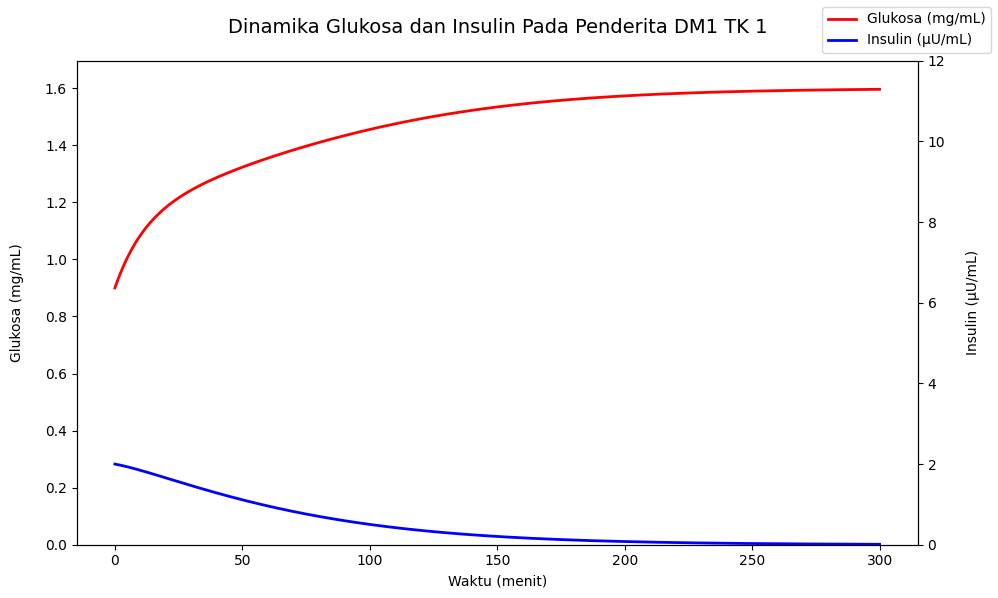

In [361]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter-parameter
alpha = 9.6  # Penerimaan glukosa
gamma = 0.06  # Penggunaan glukosa
theta = 0.009  # Pengaruh insulin
sigma = 0.012  # Efektivitas insulin
epsilon = 0.0001  # Tingkat kejenuhan
beta = 0.0002  # Laju clearance insulin

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    # Perubahan kadar glukosa (mg/dL/min)
    dGdt = alpha - gamma * G - theta * G * I
    # Perubahan kadar insulin (μU/ml/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Kondisi awal
z0 = np.array([90.0, 2.0])

# Rentang waktu simulasi
t = np.linspace(0, 300, 3000)

# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)


# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)


# Judul dan legenda
ax1.set_title('Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1', fontsize=14, pad=20)
fig.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

In [362]:
# Titik Kritis 1
G_kritis = alpha / gamma
I_kritis = 0  # Insulin pada titik kritis adalah 0

# Menampilkan titik kritis pertama
print("Titik Kritis 1:")
print("G (Glukosa) =", G_kritis)
print("I (Insulin) =", I_kritis)

# Hitung Nilai Eigen
lambda_1 = -gamma
lambda_2 = (sigma * gamma - beta * alpha) / gamma

print("\nNilai Eigen 1 (λ_1):", lambda_1)
print("Nilai Eigen 2 (λ_2):", lambda_2)

Titik Kritis 1:
G (Glukosa) = 160.0
I (Insulin) = 0

Nilai Eigen 1 (λ_1): -0.06
Nilai Eigen 2 (λ_2): -0.020000000000000004


Text(0.5, 1.0, 'Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1')

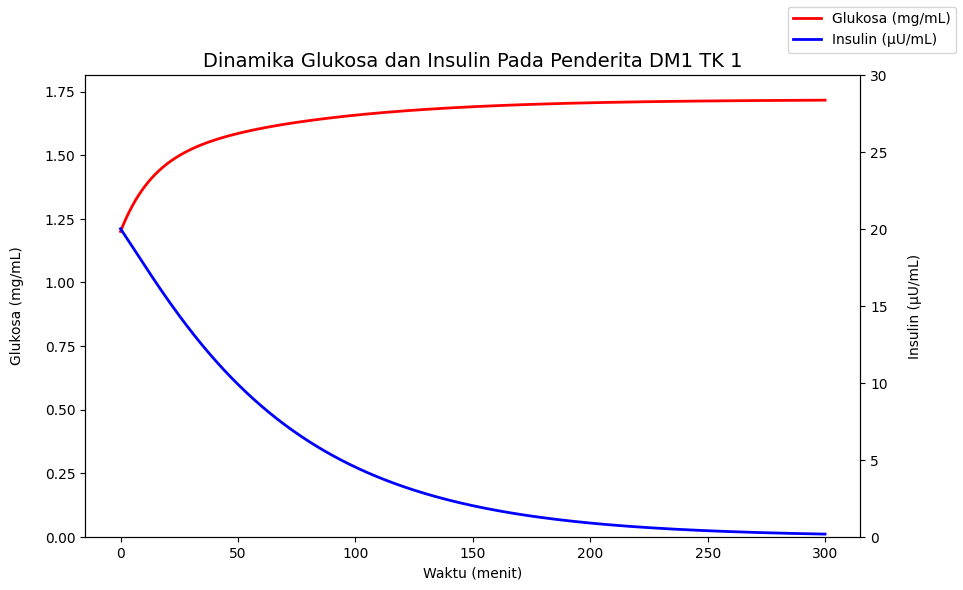

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter-parameter
alpha = 11  # Penerimaan glukosa
gamma = 0.064 # Penggunaan glukosa
theta = 0.0004  # Pengaruh insulin
sigma = 0.0006  # Efektivitas insulin
epsilon = 0.001  # Tingkat kejenuhan
beta = 0.0001  # Laju clearance insulin

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    # Perubahan kadar glukosa (mg/dL/min)
    dGdt = alpha - gamma * G - theta * G * I
    # Perubahan kadar insulin (μU/ml/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Kondisi awal
z0 = np.array([120.0, 20.0])

# Rentang waktu simulasi
t = np.linspace(0, 300, 3000)

# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)


# Tambahkan legenda
fig.legend(loc='upper right', fontsize=10)

# Judul dan grid
plt.title('Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1', fontsize=14)


In [ ]:
# Titik Kritis 1
G_kritis = alpha / gamma
I_kritis = 0  # Insulin pada titik kritis adalah 0

# Menampilkan titik kritis pertama
print("Titik Kritis 1:")
print("G (Glukosa) =", G_kritis)
print("I (Insulin) =", I_kritis)

# Hitung Nilai Eigen
lambda_1 = -gamma
lambda_2 = (sigma * gamma - beta * alpha) / gamma

print("\nNilai Eigen 1 (λ_1):", lambda_1)
print("Nilai Eigen 2 (λ_2):", lambda_2)

Titik Kritis 1:
G (Glukosa) = 171.875
I (Insulin) = 0

Nilai Eigen 1 (λ_1): -0.064
Nilai Eigen 2 (λ_2): -0.016587499999999998


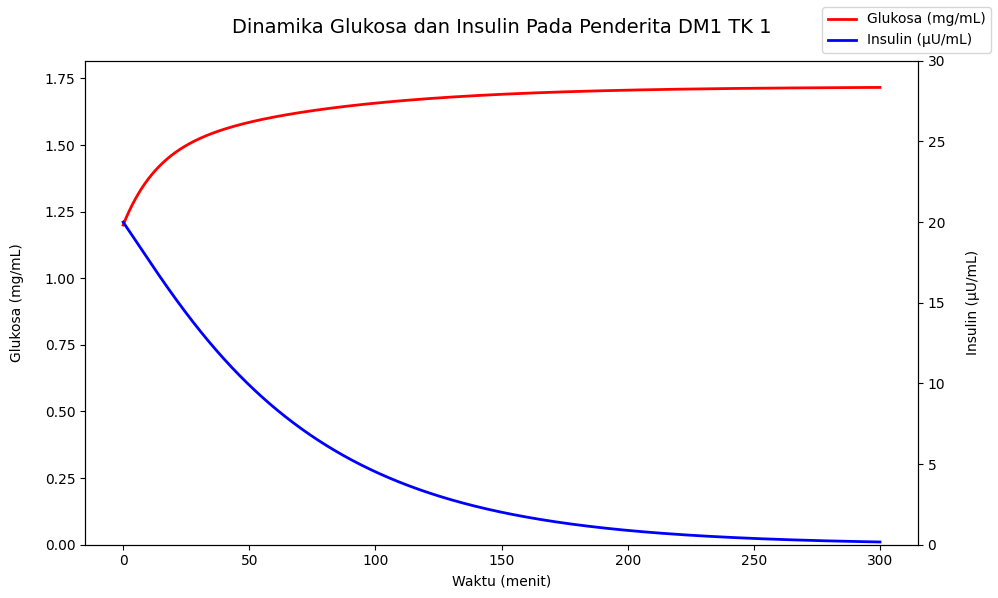

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter-parameter
alpha = 11  # Penerimaan glukosa
gamma = 0.064  # Penggunaan glukosa
theta = 0.0004  # Pengaruh insulin
sigma = 0.0006  # Efektivitas insulin
epsilon = 0.001  # Tingkat kejenuhan
beta = 0.0001  # Laju clearance insulin

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    # Perubahan kadar glukosa (mg/dL/min)
    dGdt = alpha - gamma * G - theta * G * I
    # Perubahan kadar insulin (μU/ml/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Kondisi awal
z0 = np.array([120.0, 20.0])

# Rentang waktu simulasi
t = np.linspace(0, 300, 3000)

# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)


# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)


# Judul dan legenda
ax1.set_title('Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1', fontsize=14, pad=20)
fig.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


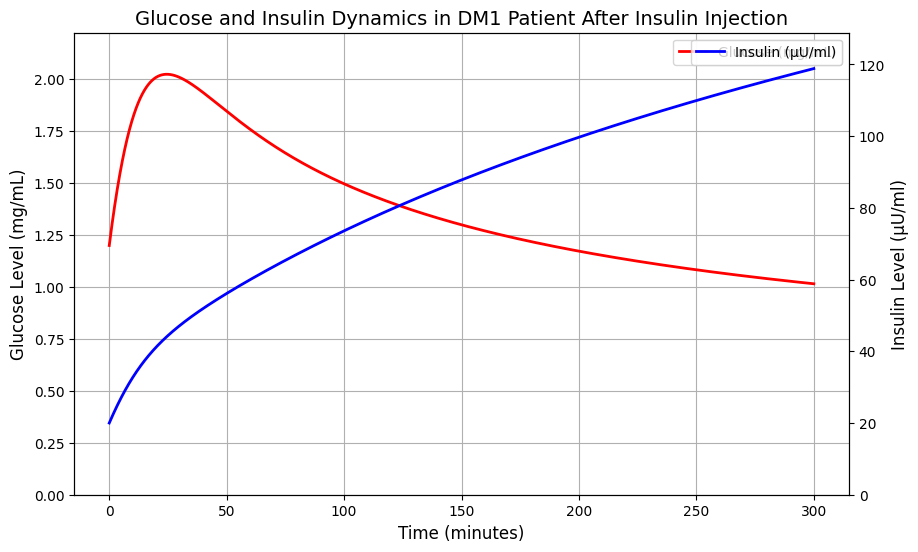

In [79]:
# Adjusting parameters to further reduce glucose drastically while keeping insulin rise controlled
alpha = 15.0  # Further lower glucose intake for an even sharper drop in glucose
gamma = 0.03  # Reduce glucose usage even further to ensure a sharper decrease
theta = 0.001  # Keeping insulin-dependent glucose usage for controlled drop
sigma = 1.5  # Keeping insulin effectiveness moderate
beta = 0.00015  # Adjusting insulin clearance slightly to ensure smoother action
epsilon = 0.75  # Further reduce insulin saturation to manage insulin rise effectively

# Run the simulation with these further adjusted parameters
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Separate results for glucose and insulin
glucose = solution[:, 0] / 100  # Convert glucose units from mg/dL to mg/mL
insulin = solution[:, 1]

# Plot the glucose and insulin graphs
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glucose on the left y-axis
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Create a right y-axis for insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)  # Ensure insulin is managed effectively
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics in DM1 Patient After Insulin Injection', fontsize=14)
plt.show()


In [48]:
# Titik Kritis 1
G_kritis = alpha / gamma
I_kritis = 0  # Insulin pada titik kritis adalah 0

# Menampilkan titik kritis pertama
print("Titik Kritis 1:")
print("G (Glukosa) =", G_kritis)
print("I (Insulin) =", I_kritis)

# Hitung Nilai Eigen
lambda_1 = -gamma
lambda_2 = (sigma * gamma - beta * alpha) / gamma

print("\nNilai Eigen 1 (λ_1):", lambda_1)
print("Nilai Eigen 2 (λ_2):", lambda_2)

Titik Kritis 1:
G (Glukosa) = 171.875
I (Insulin) = 0

Nilai Eigen 1 (λ_1): -0.064
Nilai Eigen 2 (λ_2): -0.016587499999999998


MODEL PADA DM1 INJEKSI INSULIN

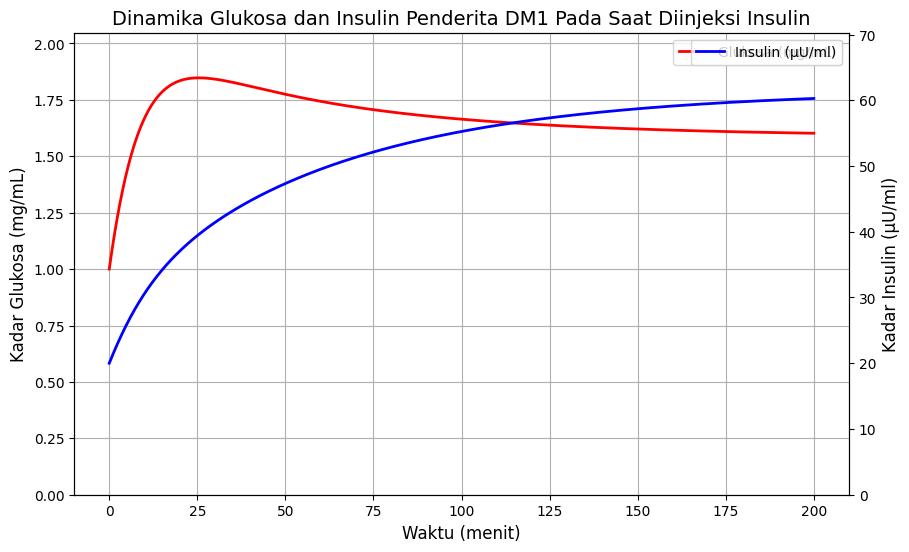

In [143]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model
alpha = 21.0  # Penerimaan glukosa
gamma = 0.08  # Penggunaan glukosa tanpa bergantung insulin
theta = 0.00085  # Penggunaan glukosa yang bergantung insulin
sigma = 1.7  # Efektivitas insulin
beta = 0.00018  # Clearance insulin
epsilon = 0.95  # Efek saturasi

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # Hingga 200 menit

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)  # Memastikan grafik tidak terpotong
ax2.legend(fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.show()


In [144]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)


Titik Kritis 2:
G (Glukosa) = 158.64567161972354
I (Insulin) = 61.61230195712954
Nilai Lambda 1 (λ₁): -0.08022082306714463
Nilai Lambda 2 (λ₂): -0.08022617345760864


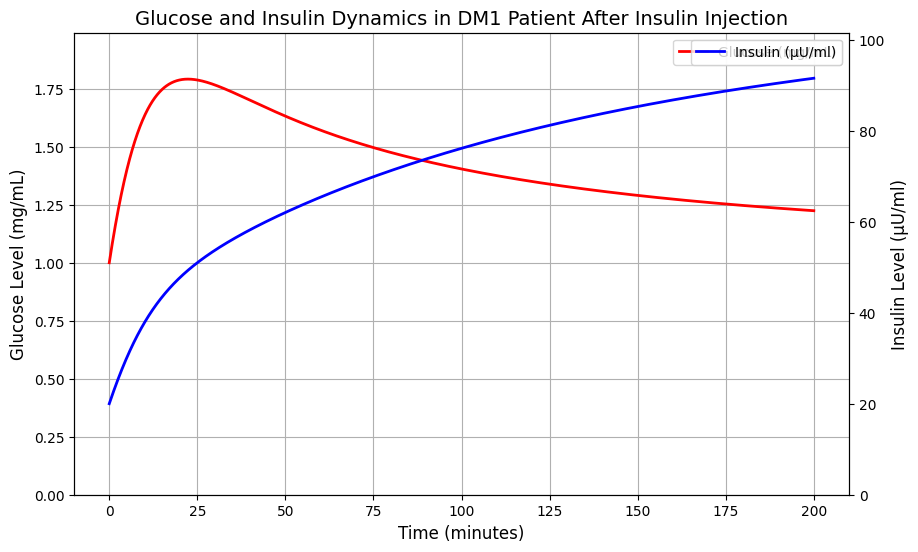

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model
alpha = 16.0  # Significantly lower glucose intake for a sharp drop
gamma = 0.04  # Lower glucose usage for a sharper drop
theta = 0.001  # Insulin-dependent glucose usage for a controlled drop
sigma = 2.5  # Keeping insulin effectiveness high
beta = 0.00025  # Moderate insulin clearance for controlled insulin action
epsilon = 0.85  # Further decrease insulin saturation to ensure insulin action remains strong

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)  # Ensure the graph is not cut off
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics in DM1 Patient After Insulin Injection', fontsize=14)
plt.show()


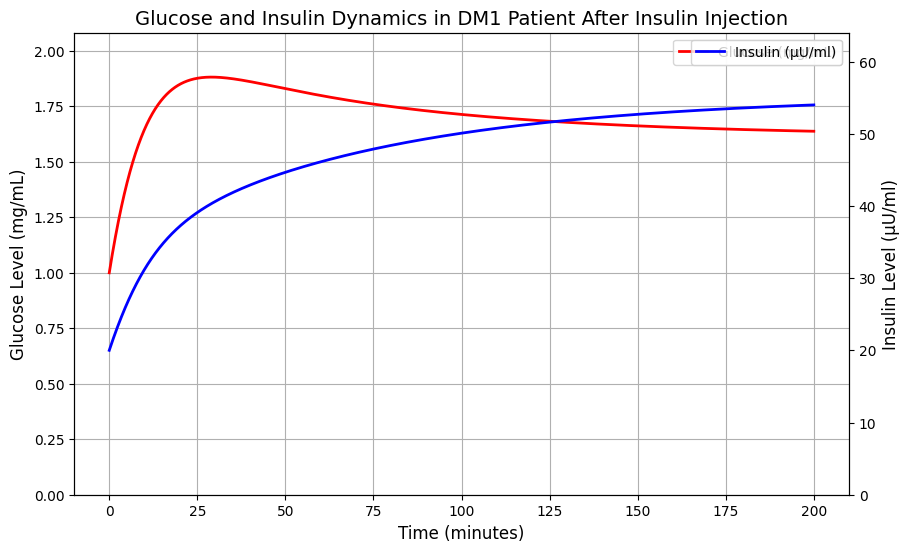

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model
alpha = 17.0  # Significantly lower glucose intake for a sharp drop
gamma = 0.05  # Lower glucose usage for a sharper drop
theta = 0.001  # Insulin-dependent glucose usage for a controlled drop
sigma = 2  # Keeping insulin effectiveness high
beta = 0.00022  # Moderate insulin clearance for controlled insulin action
epsilon = 1  # Further decrease insulin saturation to ensure insulin action remains strong

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)  # Ensure the graph is not cut off
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics in DM1 Patient After Insulin Injection', fontsize=14)
plt.show()


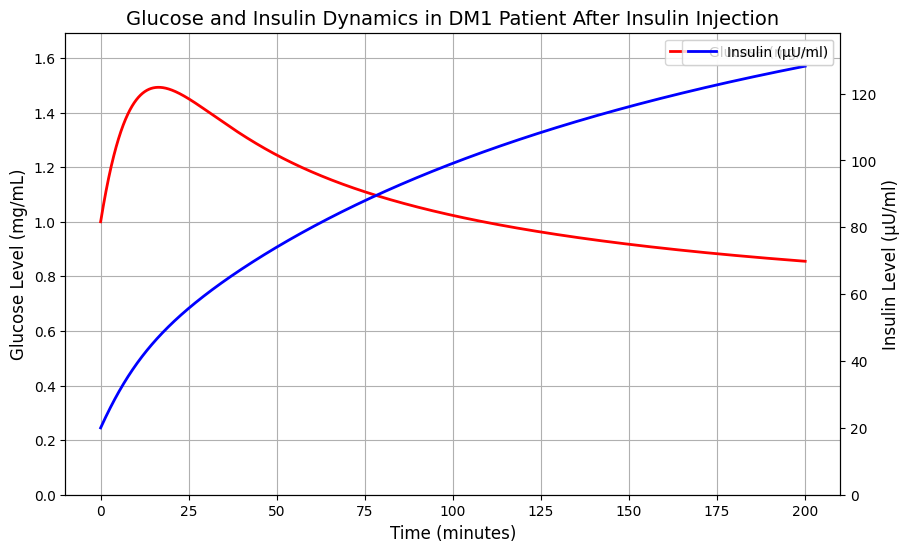

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model
alpha = 16.0  # Significantly lower glucose intake for a sharp drop
gamma = 0.06  # Lower glucose usage for a sharper drop
theta = 0.001  # Insulin-dependent glucose usage for a controlled drop
sigma = 2.5  # Keeping insulin effectiveness high
beta = 0.00025  # Moderate insulin clearance for controlled insulin action
epsilon = 0.84  # Further decrease insulin saturation to ensure insulin action remains strong

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)  # Ensure the graph is not cut off
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics in DM1 Patient After Insulin Injection', fontsize=14)
plt.show()


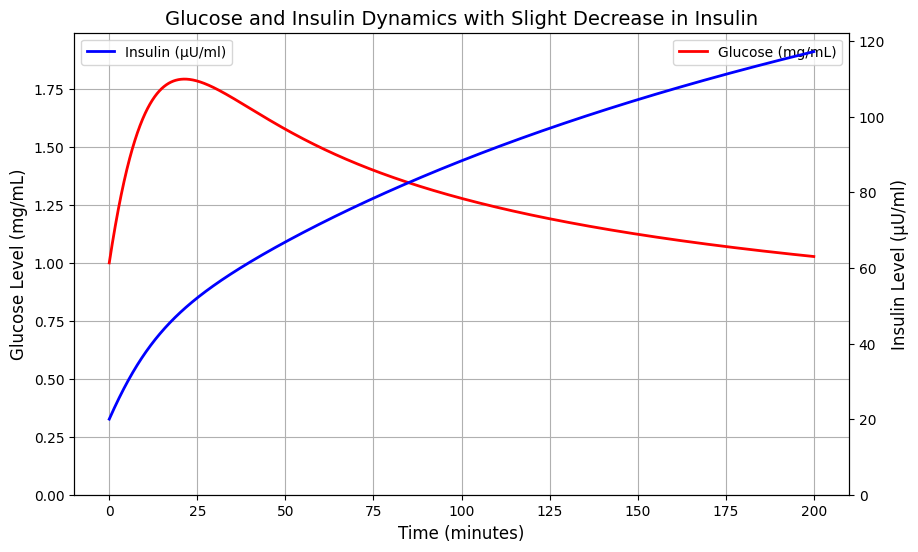

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model
alpha = 16.0  # Significantly lower glucose intake for a sharp drop
gamma = 0.04  # Lower glucose usage for a sharper drop
theta = 0.001  # Insulin-dependent glucose usage for a controlled drop
sigma = 2.0  # Slightly lower insulin effectiveness for gradual insulin decrease
beta = 0.0002  # Slightly adjust insulin clearance for controlled insulin action
epsilon = 0.75  # Slightly reduce insulin saturation to moderate the insulin decrease

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 5)  # Slightly reduce insulin levels
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics with Slight Decrease in Insulin', fontsize=14)
plt.show()


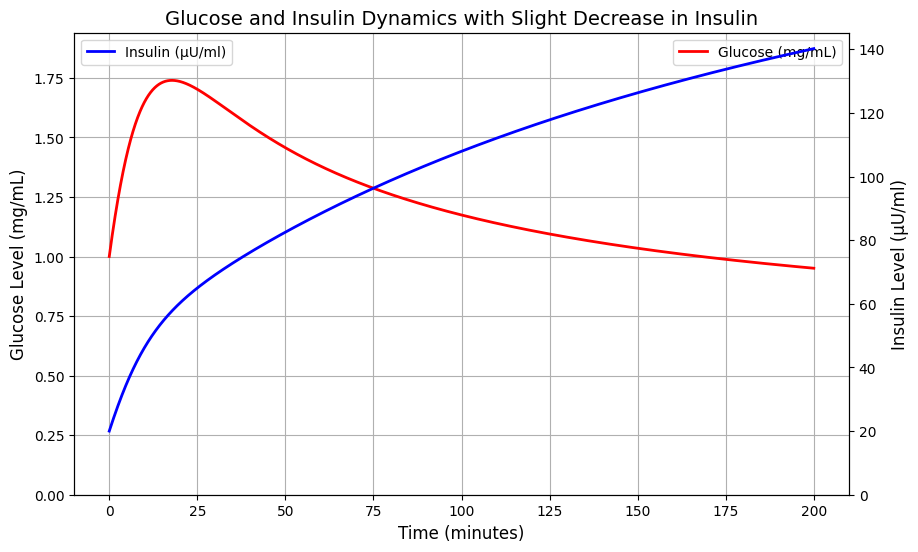

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model
alpha = 17.0  # Significantly lower glucose intake for a sharp drop
gamma = 0.04  # Lower glucose usage for a sharper drop
theta = 0.001  # Insulin-dependent glucose usage for a controlled drop
sigma = 3.0  # Slightly lower insulin effectiveness for gradual insulin decrease
beta = 0.0003  # Slightly adjust insulin clearance for controlled insulin action
epsilon = 0.7  # Slightly reduce insulin saturation to moderate the insulin decrease

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 5)  # Slightly reduce insulin levels
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics with Slight Decrease in Insulin', fontsize=14)
plt.show()


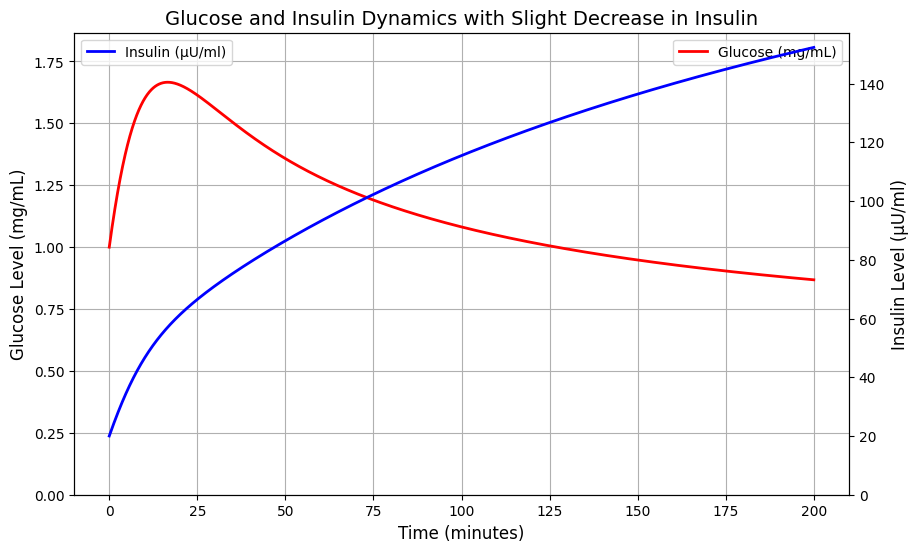

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model
alpha = 17.0  # Significantly lower glucose intake for a sharp drop
gamma = 0.045  # Lower glucose usage for a sharper drop
theta = 0.001  # Insulin-dependent glucose usage for a controlled drop
sigma = 3.0  # Slightly lower insulin effectiveness for gradual insulin decrease
beta = 0.0003  # Slightly adjust insulin clearance for controlled insulin action
epsilon = 0.7  # Slightly reduce insulin saturation to moderate the insulin decrease

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 5)  # Slightly reduce insulin levels
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics with Slight Decrease in Insulin', fontsize=14)
plt.show()


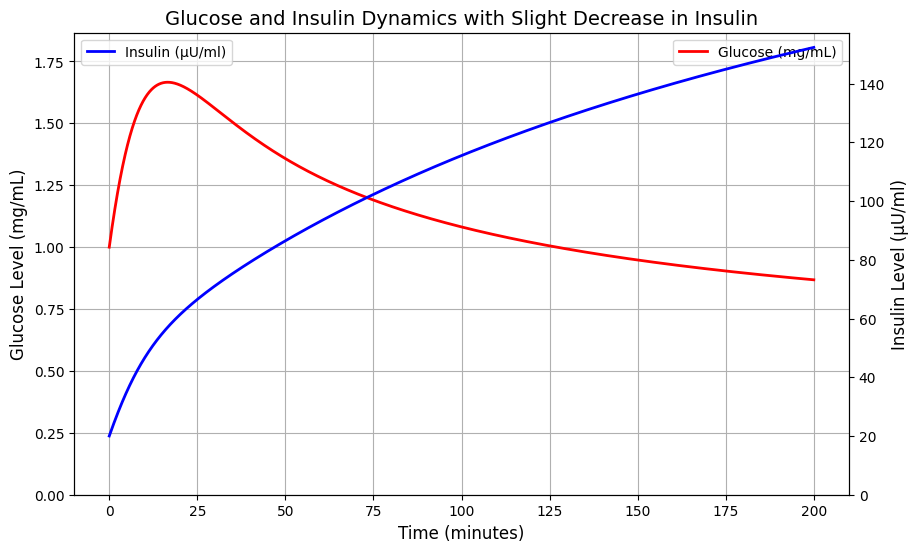

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model
alpha = 17.0  # Significantly lower glucose intake for a sharp drop
gamma = 0.045  # Lower glucose usage for a sharper drop
theta = 0.001  # Insulin-dependent glucose usage for a controlled drop
sigma = 3.0  # Slightly lower insulin effectiveness for gradual insulin decrease
beta = 0.0003  # Slightly adjust insulin clearance for controlled insulin action
epsilon = 0.7  # Slightly reduce insulin saturation to moderate the insulin decrease

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 5)  # Slightly reduce insulin levels
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics with Slight Decrease in Insulin', fontsize=14)
plt.show()


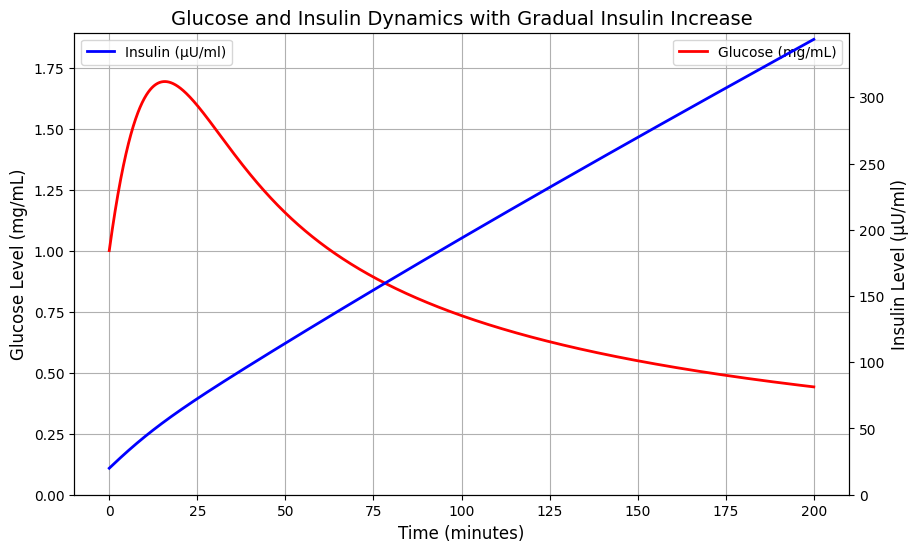

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter yang telah disesuaikan
alpha = 17.0  # Menurunkan asupan glukosa
gamma = 0.045  # Meningkatkan penggunaan glukosa agar turun cepat
theta = 0.001  # Efek insulin terhadap glukosa
sigma = 1.5  # Menurunkan produksi insulin agar naik lebih pelan
beta = 0.0001  # Mengurangi pengurangan insulin akibat interaksi dengan glukosa
epsilon = 0.5  # Menyesuaikan saturasi insulin agar kenaikan bertahap

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 5)  # Menyesuaikan batas atas insulin
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics with Gradual Insulin Increase', fontsize=14)
plt.show()


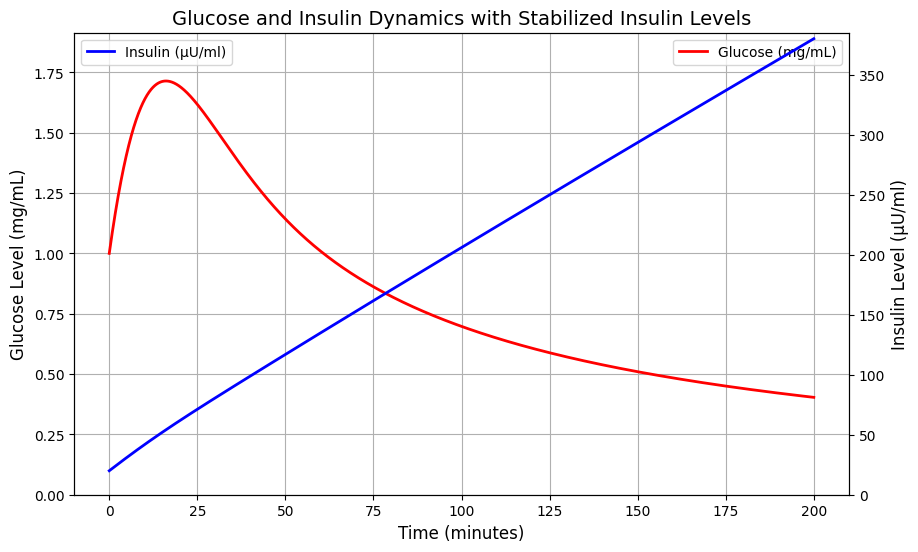

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter yang telah disesuaikan
alpha = 17.0   # Menurunkan asupan glukosa
gamma = 0.045  # Meningkatkan penggunaan glukosa agar turun cepat
theta = 0.001  # Efek insulin terhadap glukosa
sigma = 2.0    # MENAIKKAN produksi insulin supaya tidak turun terlalu cepat
beta = 0.00005 # MENGURANGI laju pembuangan insulin supaya lebih stabil
epsilon = 0.8  # MENINGKATKAN saturasi insulin agar penurunannya lebih lambat

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 5)  # Menyesuaikan batas atas insulin
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics with Stabilized Insulin Levels', fontsize=14)
plt.show()


BAGUS MENDEKATI

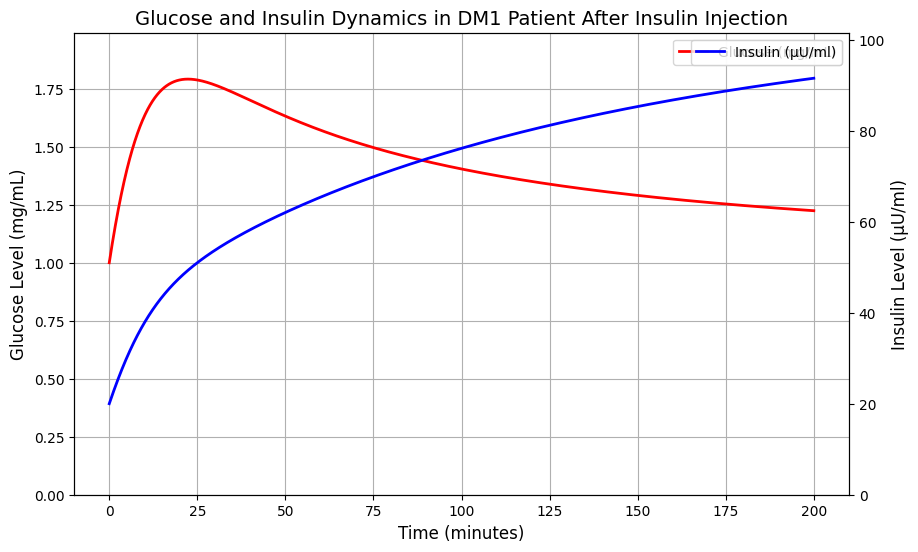

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model
alpha = 16.0  # Significantly lower glucose intake for a sharp drop
gamma = 0.04  # Lower glucose usage for a sharper drop
theta = 0.001  # Insulin-dependent glucose usage for a controlled drop
sigma = 2.5  # Keeping insulin effectiveness high
beta = 0.00025  # Moderate insulin clearance for controlled insulin action
epsilon = 0.85  # Further decrease insulin saturation to ensure insulin action remains strong

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)  # Ensure the graph is not cut off
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics in DM1 Patient After Insulin Injection', fontsize=14)
plt.show()


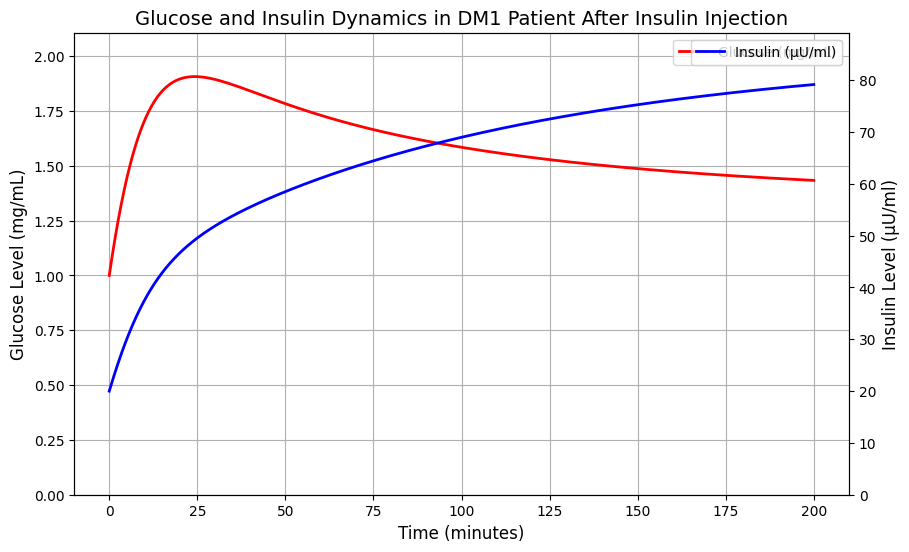

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model
alpha = 17.0  # Significantly lower glucose intake for a sharp drop
gamma = 0.04  # Lower glucose usage for a sharper drop
theta = 0.001  # Insulin-dependent glucose usage for a controlled drop
sigma = 2.5  # Keeping insulin effectiveness high
beta = 0.00025  # Moderate insulin clearance for controlled insulin action
epsilon = 0.85  # Further decrease insulin saturation to ensure insulin action remains strong

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)  # Ensure the graph is not cut off
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics in DM1 Patient After Insulin Injection', fontsize=14)
plt.show()


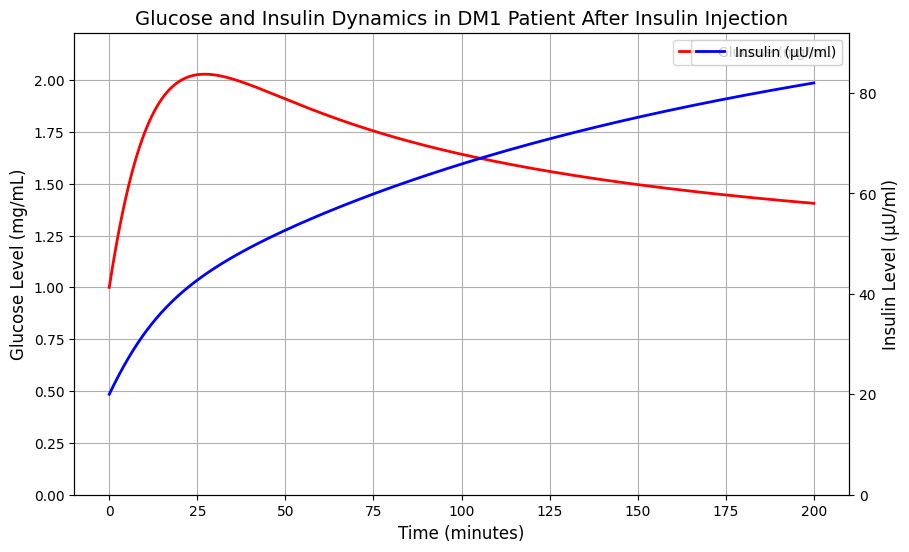

In [152]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model yang lebih diturunkan insulin
alpha = 17.0  # Glukosa masuk
gamma = 0.04  # Penggunaan glukosa
theta = 0.001  # Penggunaan glukosa yang bergantung pada insulin
sigma = 1.5  # Efektivitas insulin lebih diturunkan
beta = 0.00015  # Pengurangan insulin lebih rendah
epsilon = 0.8  # Saturasi insulin tetap sedikit diturunkan

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 menit untuk simulasi

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)  # Ensure the graph is not cut off
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics in DM1 Patient After Insulin Injection', fontsize=14)
plt.show()


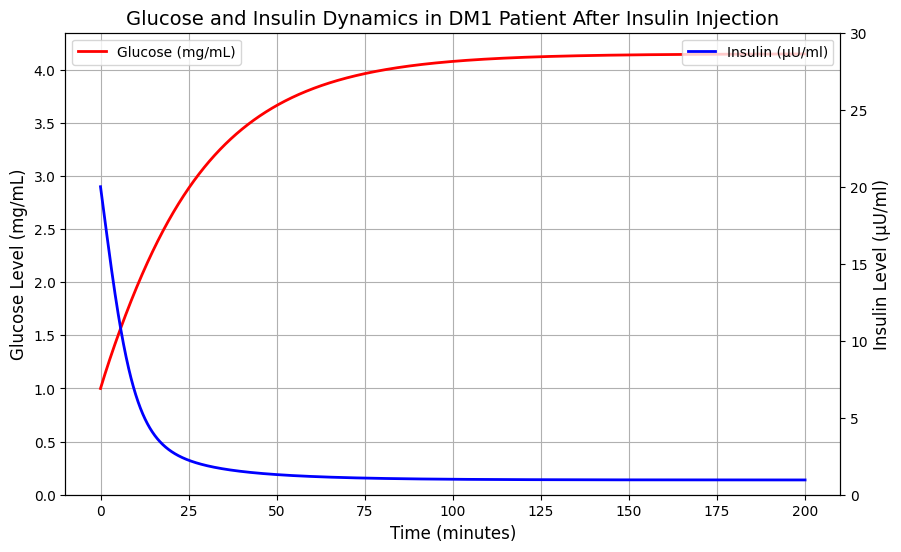

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model yang lebih diturunkan insulin
alpha = 17.0  # Glukosa masuk
gamma = 0.04  # Penggunaan glukosa
theta = 0.001  # Penggunaan glukosa yang bergantung pada insulin
sigma = 1.1  # Efektivitas insulin lebih diturunkan
beta = 0.0015  # Pengurangan insulin lebih rendah
epsilon = 0.8  # Saturasi insulin tetap sedikit diturunkan

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 menit untuk simulasi

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)  # Ensure the graph is not cut off
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics in DM1 Patient After Insulin Injection', fontsize=14)
plt.show()


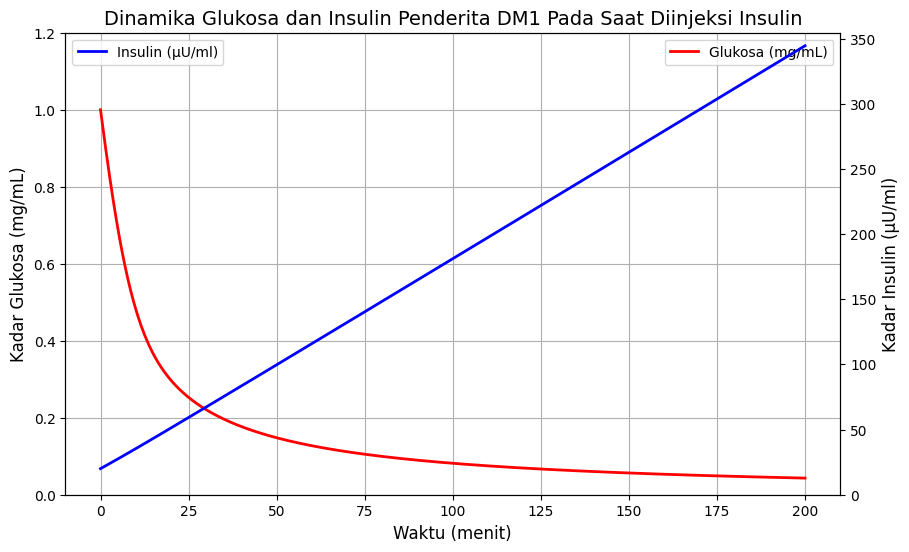

In [168]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model
alpha = 12.0  # Penerimaan glukosa
gamma = 0.03  # Penggunaan glukosa tanpa bergantung insulin
theta = 0.008  # Penggunaan glukosa yang bergantung insulin
sigma = 1.7  # Efektivitas insulin
beta = 0.0001  # Clearance insulin
epsilon = 0.95  # Efek saturasi

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # Hingga 200 menit

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)  # Memastikan grafik tidak terpotong
ax2.legend(fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.show()


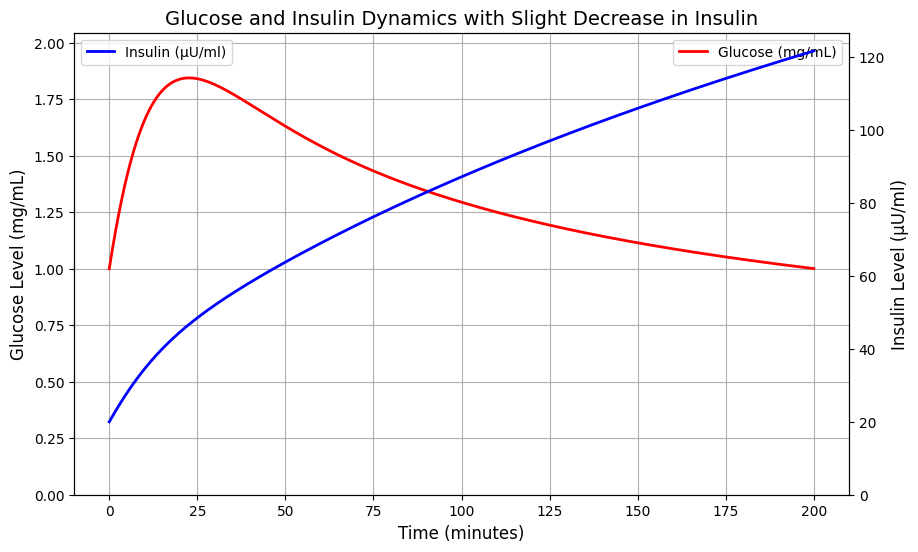

In [169]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model (dengan sedikit penurunan insulin)
alpha = 16.0  # Glucose intake remains unchanged
gamma = 0.04  # Glucose usage remains unchanged
theta = 0.001  # Insulin-dependent glucose usage remains unchanged
sigma = 1.5  # Slightly lower insulin effectiveness
beta = 0.00015  # Slightly adjust insulin clearance for controlled decrease
epsilon = 0.7  # Slightly reduce insulin saturation to moderate the insulin decrease

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 5)  # Slightly reduce insulin levels
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics with Slight Decrease in Insulin', fontsize=14)
plt.show()


mendekati

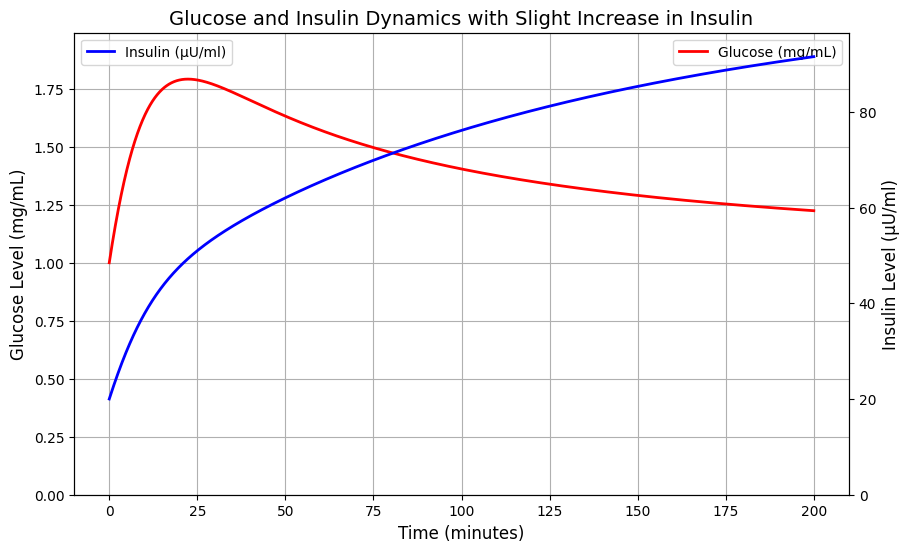

In [170]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model (dengan sedikit peningkatan insulin)
alpha = 16.0  # Glucose intake remains unchanged
gamma = 0.04  # Glucose usage remains unchanged
theta = 0.001  # Insulin-dependent glucose usage remains unchanged
sigma = 2.5  # Increased insulin effectiveness
beta = 0.00025  # Increased insulin clearance rate for higher insulin levels
epsilon = 0.85  # Increased insulin saturation to allow higher insulin levels

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 5)  # Increase insulin levels
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics with Slight Increase in Insulin', fontsize=14)
plt.show()


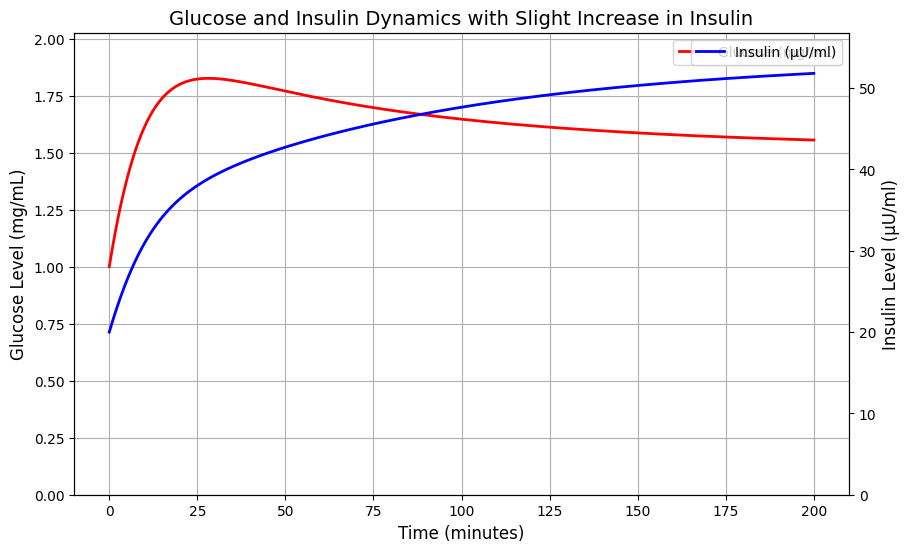

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model (dengan sedikit peningkatan insulin)
alpha = 16.0  # Glucose intake remains unchanged
gamma = 0.041  # Glucose usage remains unchanged
theta = 0.0012  # Insulin-dependent glucose usage remains unchanged
sigma = 1.75  # Increased insulin effectiveness
beta = 0.00025  # Increased insulin clearance rate for higher insulin levels
epsilon = 0.84  # Increased insulin saturation to allow higher insulin levels

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 5)  # Increase insulin levels
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics with Slight Increase in Insulin', fontsize=14)
plt.show()


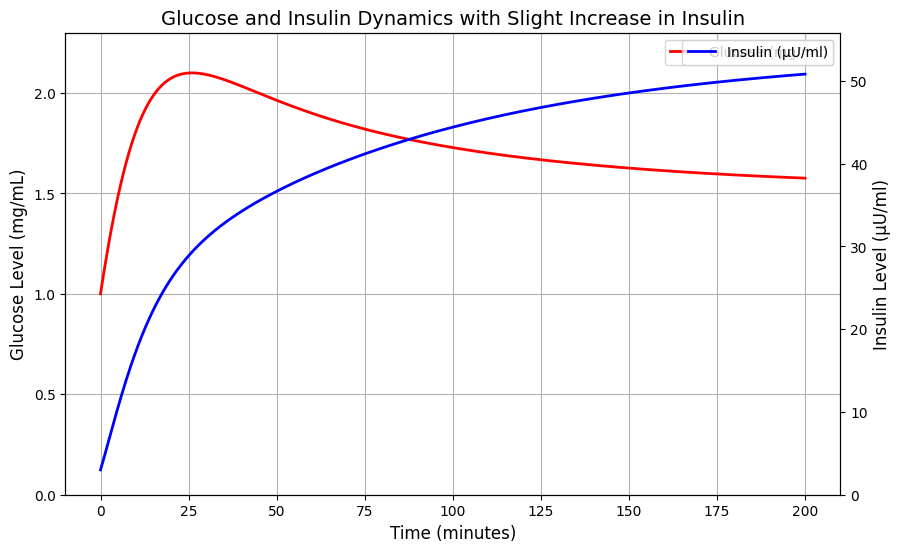

In [185]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter untuk model (dengan sedikit peningkatan insulin)
alpha = 16.0  # Glucose intake remains unchanged
gamma = 0.041  # Glucose usage remains unchanged
theta = 0.0012  # Insulin-dependent glucose usage remains unchanged
sigma = 1.75  # Increased insulin effectiveness
beta = 0.00025  # Increased insulin clearance rate for higher insulin levels
epsilon = 0.84  # Increased insulin saturation to allow higher insulin levels

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # 200 minutes for the simulation

# Kondisi awal (glukosa 100 mg/dL, insulin 20 μU/ml)
z0 = np.array([100.0, 3.0])

# Simulasi ulang dengan parameter yang disesuaikan
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glucose (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Glucose Level (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.2)  # Adjust scale for better clarity
ax1.legend(fontsize=10)
ax1.grid(True)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Insulin Level (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 5)  # Increase insulin levels
ax2.legend(fontsize=10)

plt.title('Glucose and Insulin Dynamics with Slight Increase in Insulin', fontsize=14)
plt.show()


Text(0.5, 1.0, 'Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1')

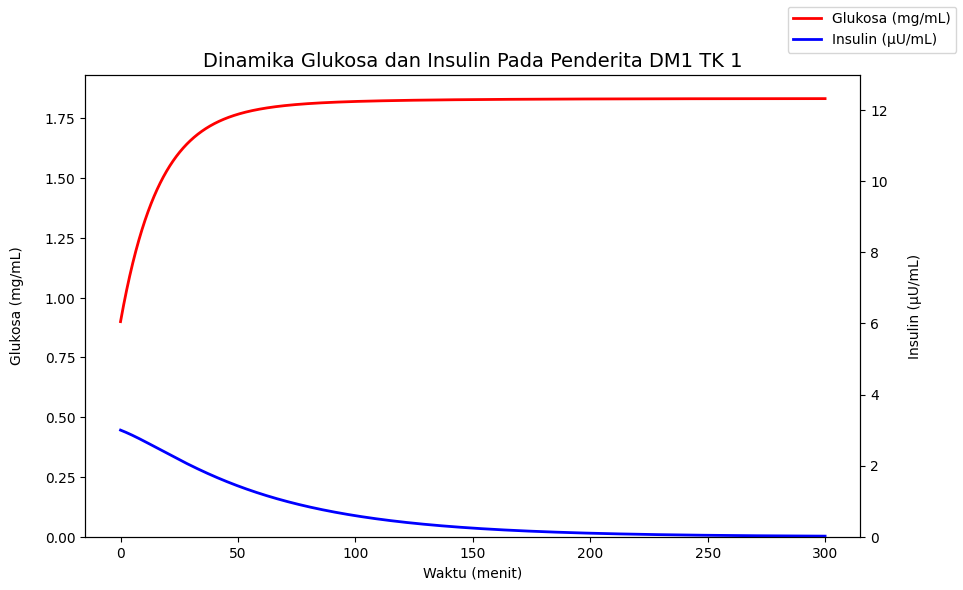

In [195]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter-parameter
alpha = 11  # Penerimaan glukosa
gamma = 0.06 # Penggunaan glukosa
theta = 0.0004  # Pengaruh insulin
sigma = 0.0004  # Efektivitas insulin
epsilon = 0.002  # Tingkat kejenuhan
beta = 0.0001  # Laju clearance insulin

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    # Perubahan kadar glukosa (mg/dL/min)
    dGdt = alpha - gamma * G - theta * G * I
    # Perubahan kadar insulin (μU/ml/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Kondisi awal
z0 = np.array([90.0, 3.0])

# Rentang waktu simulasi
t = np.linspace(0, 300, 3000)

# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)


# Tambahkan legenda
fig.legend(loc='upper right', fontsize=10)

# Judul dan grid
plt.title('Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1', fontsize=14)


Text(0.5, 1.0, 'Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1')

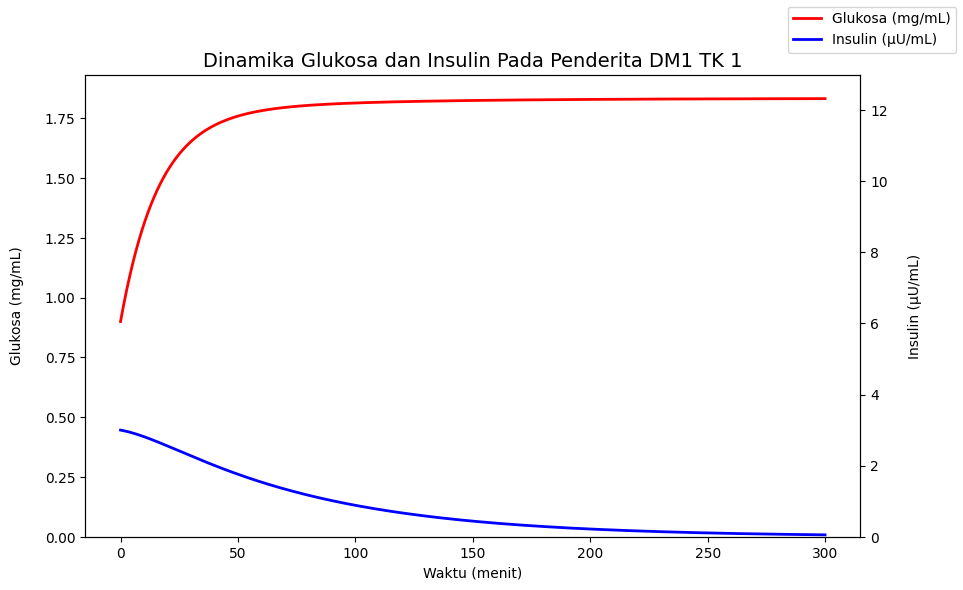

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter-parameter
alpha = 11  # Penerimaan glukosa
gamma = 0.06 # Penggunaan glukosa
theta = 0.0005  # Pengaruh insulin
sigma = 0.006  # Efektivitas insulin
epsilon = 0.0002  # Tingkat kejenuhan
beta = 0.00011  # Laju clearance insulin

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    # Perubahan kadar glukosa (mg/dL/min)
    dGdt = alpha - gamma * G - theta * G * I
    # Perubahan kadar insulin (μU/ml/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Kondisi awal
z0 = np.array([90.0, 3.0])

# Rentang waktu simulasi
t = np.linspace(0, 300, 3000)

# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)


# Tambahkan legenda
fig.legend(loc='upper right', fontsize=10)

# Judul dan grid
plt.title('Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1', fontsize=14)


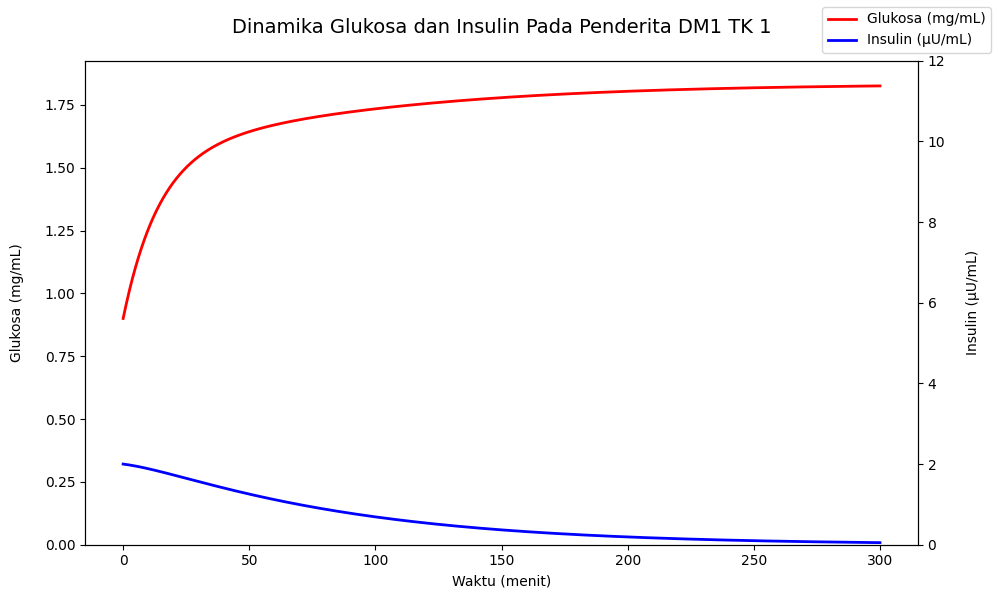

In [230]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter-parameter
alpha = 11  # Penerimaan glukosa
gamma = 0.06  # Penggunaan glukosa
theta = 0.004  # Pengaruh insulin
sigma = 0.005  # Efektivitas insulin
epsilon = 0.0002  # Tingkat kejenuhan
beta = 0.0001  # Laju clearance insulin

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    # Perubahan kadar glukosa (mg/dL/min)
    dGdt = alpha - gamma * G - theta * G * I
    # Perubahan kadar insulin (μU/ml/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Kondisi awal
z0 = np.array([90.0, 2.0])

# Rentang waktu simulasi
t = np.linspace(0, 300, 3000)

# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)


# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)


# Judul dan legenda
ax1.set_title('Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1', fontsize=14, pad=20)
fig.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


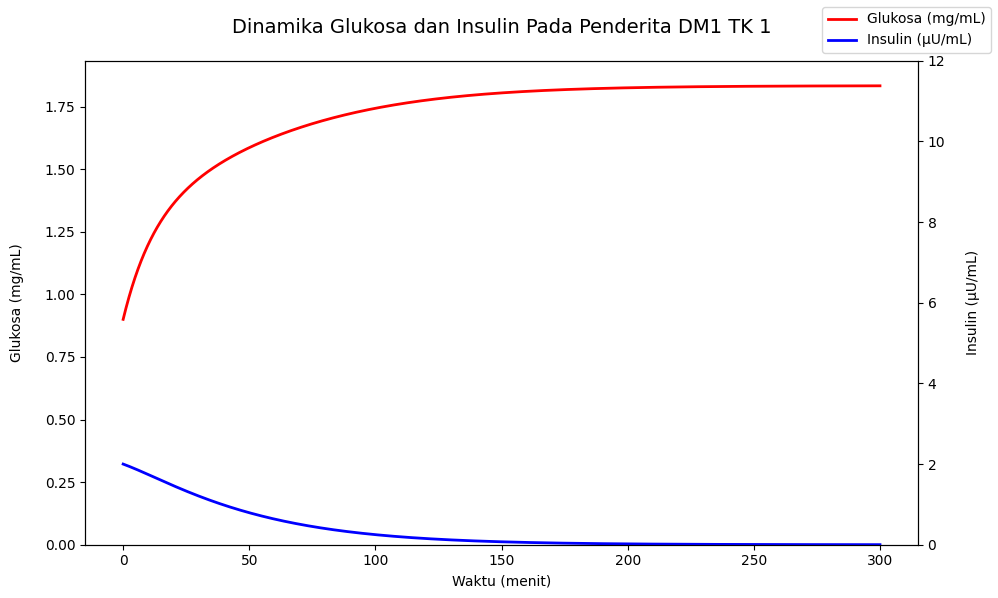

In [242]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter-parameter
alpha = 11  # Penerimaan glukosa
gamma = 0.06  # Penggunaan glukosa
theta = 0.008  # Pengaruh insulin
sigma = 0.002  # Efektivitas insulin
epsilon = 0.0002  # Tingkat kejenuhan
beta = 0.00015  # Laju clearance insulin

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    # Perubahan kadar glukosa (mg/dL/min)
    dGdt = alpha - gamma * G - theta * G * I
    # Perubahan kadar insulin (μU/ml/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Kondisi awal
z0 = np.array([90.0, 2.0])

# Rentang waktu simulasi
t = np.linspace(0, 300, 3000)

# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)


# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)


# Judul dan legenda
ax1.set_title('Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1', fontsize=14, pad=20)
fig.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

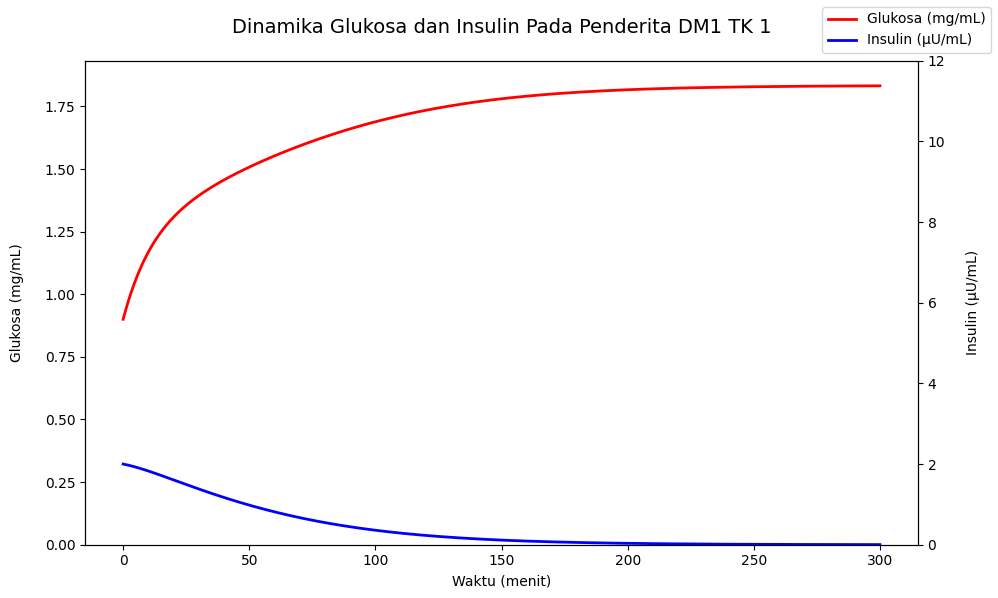

In [323]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter-parameter
alpha = 11  # Penerimaan glukosa
gamma = 0.06  # Penggunaan glukosa
theta = 0.01  # Pengaruh insulin
sigma = 0.012  # Efektivitas insulin
epsilon = 0.0002  # Tingkat kejenuhan
beta = 0.0002  # Laju clearance insulin

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    # Perubahan kadar glukosa (mg/dL/min)
    dGdt = alpha - gamma * G - theta * G * I
    # Perubahan kadar insulin (μU/ml/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Kondisi awal
z0 = np.array([90.0, 2.0])

# Rentang waktu simulasi
t = np.linspace(0, 300, 3000)

# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)


# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)


# Judul dan legenda
ax1.set_title('Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1', fontsize=14, pad=20)
fig.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

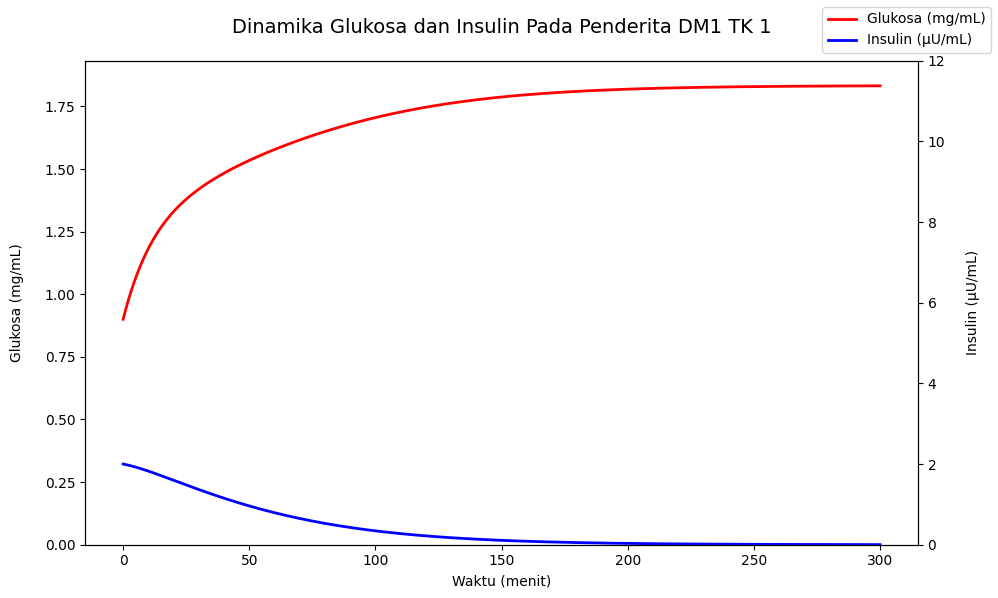

In [328]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter-parameter
alpha = 11  # Penerimaan glukosa
gamma = 0.06  # Penggunaan glukosa
theta = 0.009  # Pengaruh insulin
sigma = 0.012  # Efektivitas insulin
epsilon = 0.0001  # Tingkat kejenuhan
beta = 0.0002  # Laju clearance insulin

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    # Perubahan kadar glukosa (mg/dL/min)
    dGdt = alpha - gamma * G - theta * G * I
    # Perubahan kadar insulin (μU/ml/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Kondisi awal
z0 = np.array([90.0, 2.0])

# Rentang waktu simulasi
t = np.linspace(0, 300, 3000)

# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)


# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)


# Judul dan legenda
ax1.set_title('Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1', fontsize=14, pad=20)
fig.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()